In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 10,10
rcParams['axes.linewidth'] = 4.0
rcParams['savefig.dpi'] = 500
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['agg.path.chunksize'] = 10000

# SERT Distances

In [3]:
def calcStats (data):
    avg=np.average(data)
    std=np.std(data, dtype=np.float64)
    result = avg, u"\u00B1", std
    print('The average Dist is:', result)
    #return result
    minVal = data[data > .01].min(axis=0)
    maxVal = data.max()
    print("Range of Dist is ", minVal, "-", maxVal)

def HBondCutoff (data, cutoffTemp):    
    allLen = len(data)
    cutoff=(cutoffTemp + .1)
    t = list(filter((cutoff).__ge__, data))
    lenVar = len(t)
    percent = (lenVar/allLen * 100)
    print("Percentage for a", cutoffTemp ,"\u212B cuttoff is: ", percent,"%")

In [4]:
data=np.loadtxt('/mnt/u1/sert/md-10ns/ptraj/dist.322-571.out',comments='#',usecols=1)

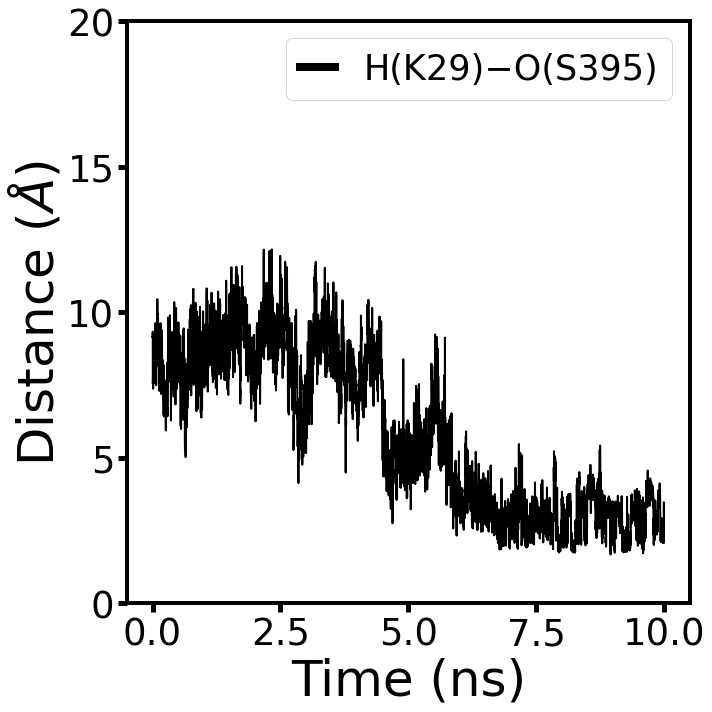

In [9]:
x = np.arange(len(data))/500
plt.plot(x,data, color='k', linewidth =2, label='H(K29)\N{MINUS SIGN}O(S395)')

leg = plt.legend(fontsize=35,handlelength=1,loc="best")

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

plt.ylabel("Distance ($\AA$)", fontsize=50)
plt.yticks((np.arange(0, 25, step=5)), fontsize=35)
plt.xlabel("Time (ns)", fontsize=50)
plt.xticks(fontsize=35)
plt.tick_params(axis='both', labelsize='37', length=9, width=5)
plt.tight_layout()
plt.savefig("../figs/dist3.png", transparent=True)